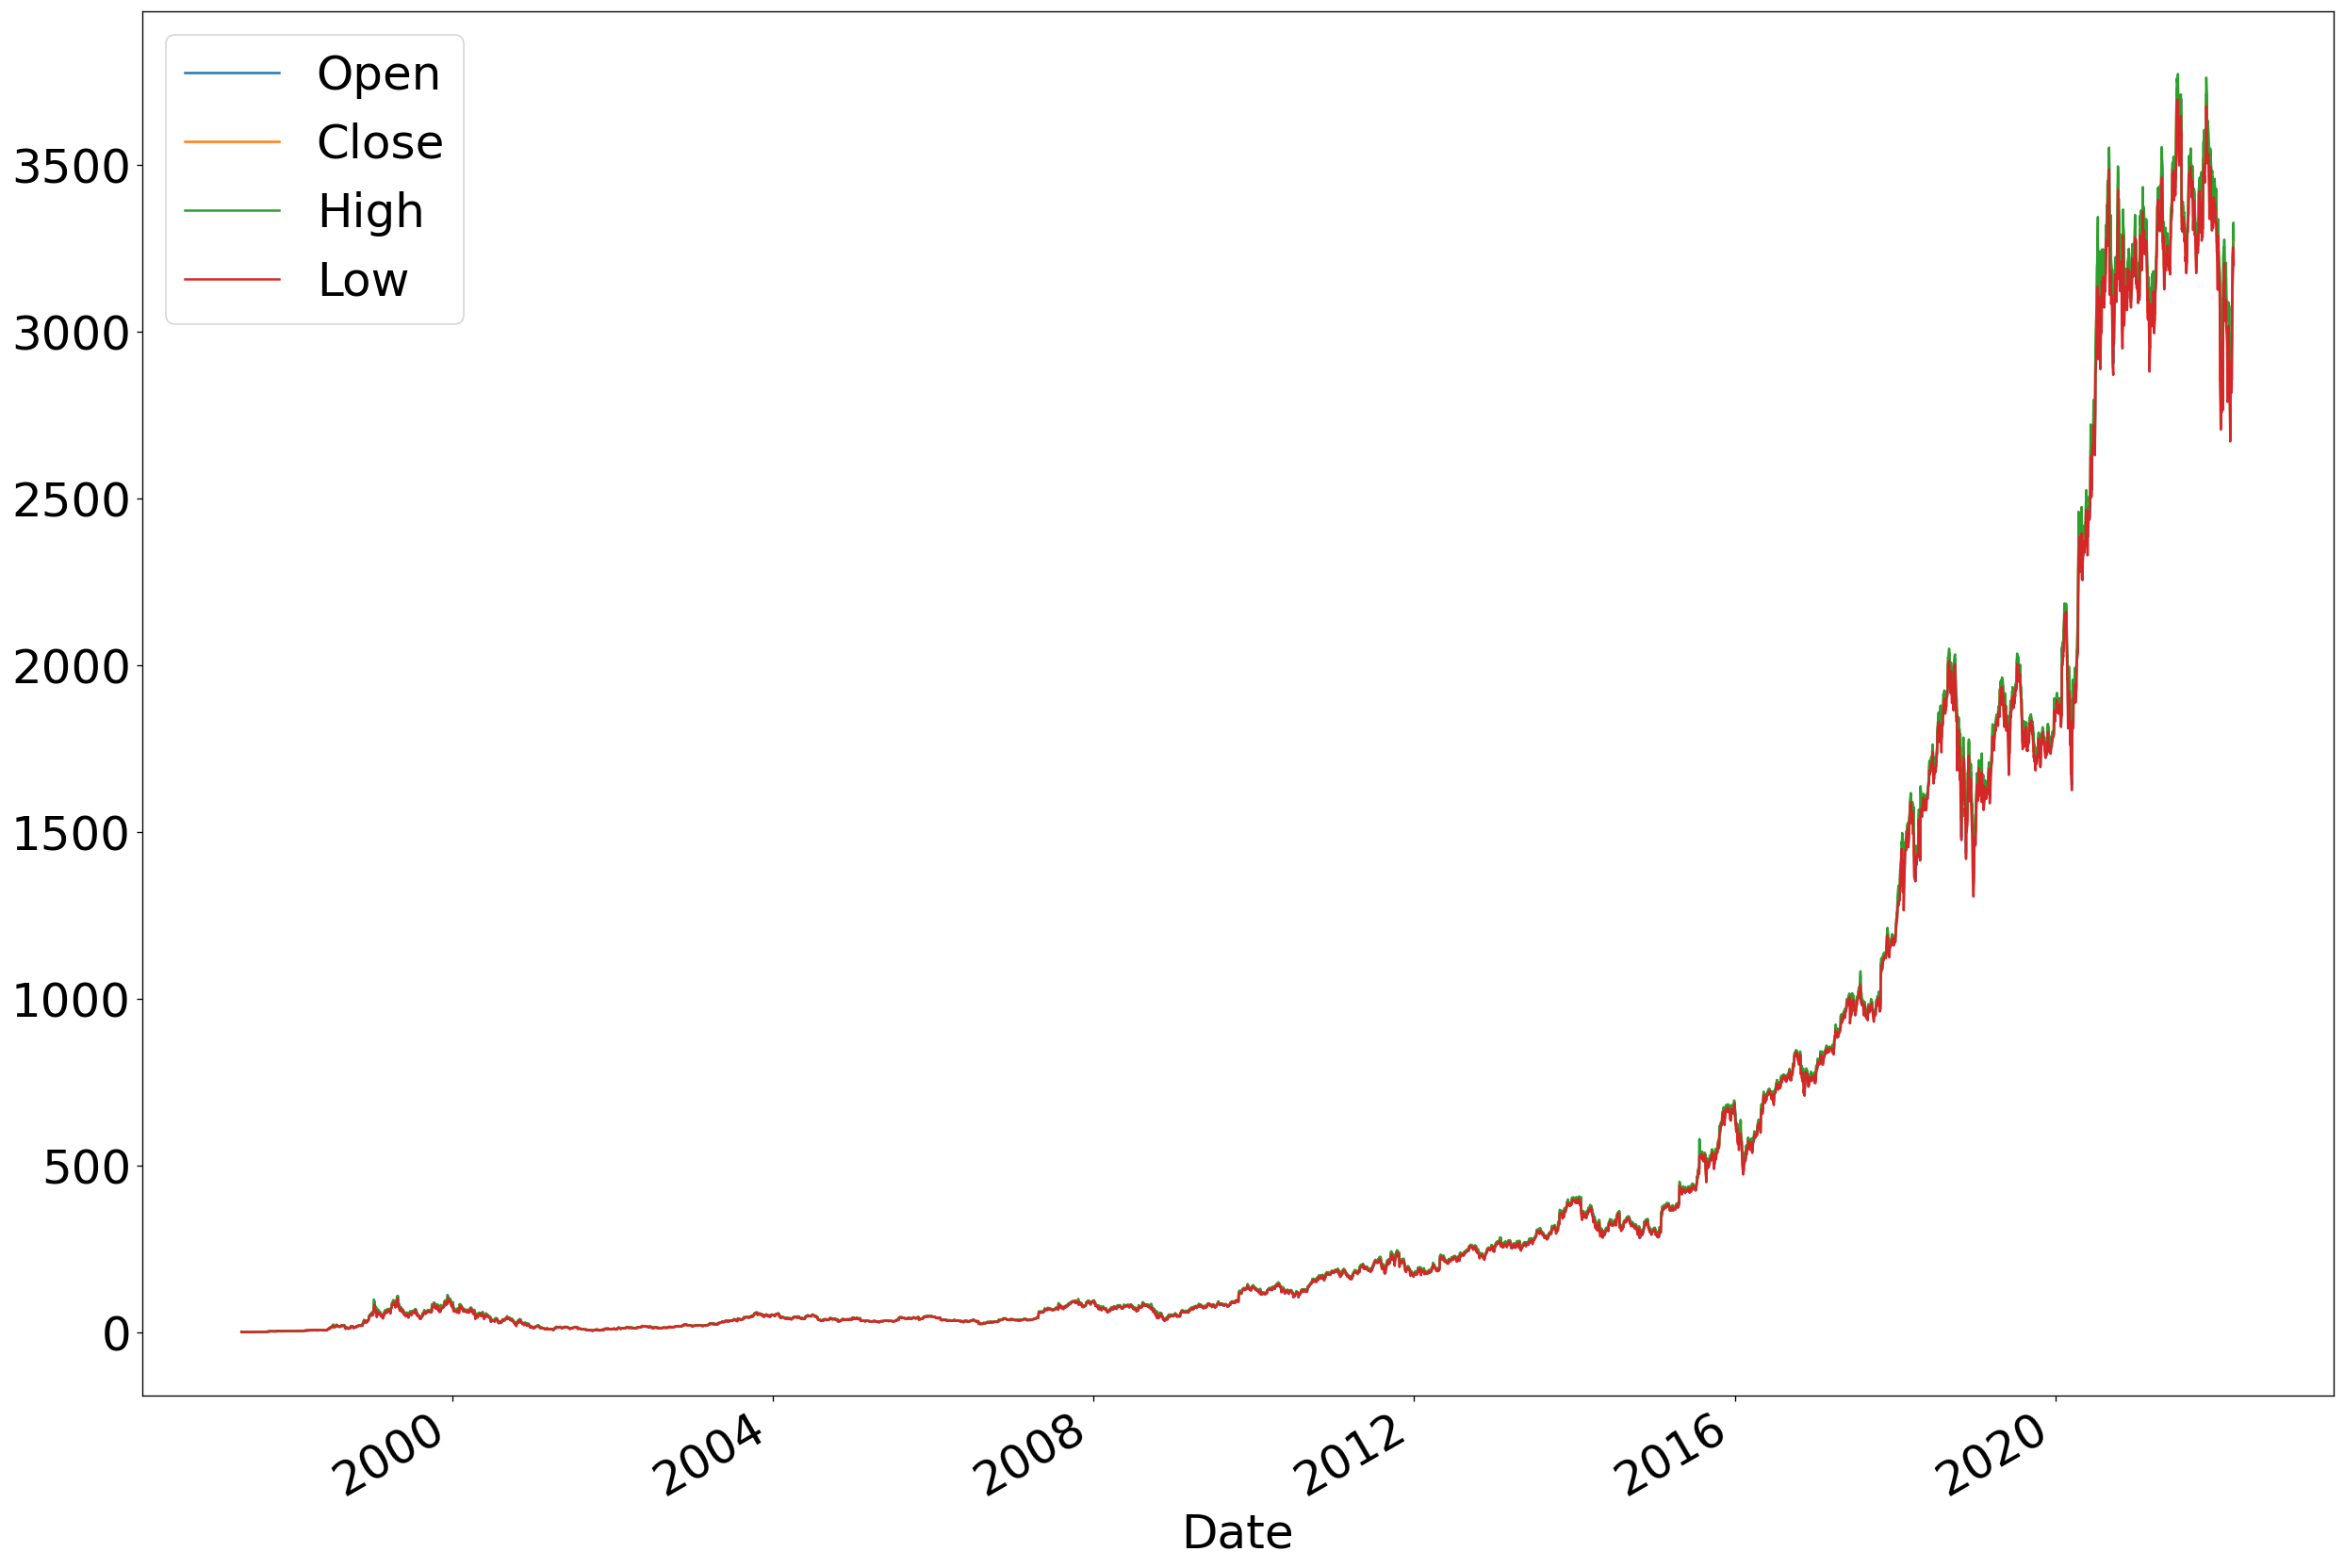

p ADF test serie originale (Open) : 0.9989714464913109
p ADF test serie differenziata 1 volta (Open) : 6.793007408186177e-27
p ADF test serie differenziata 2 volte (Open) : 0.0


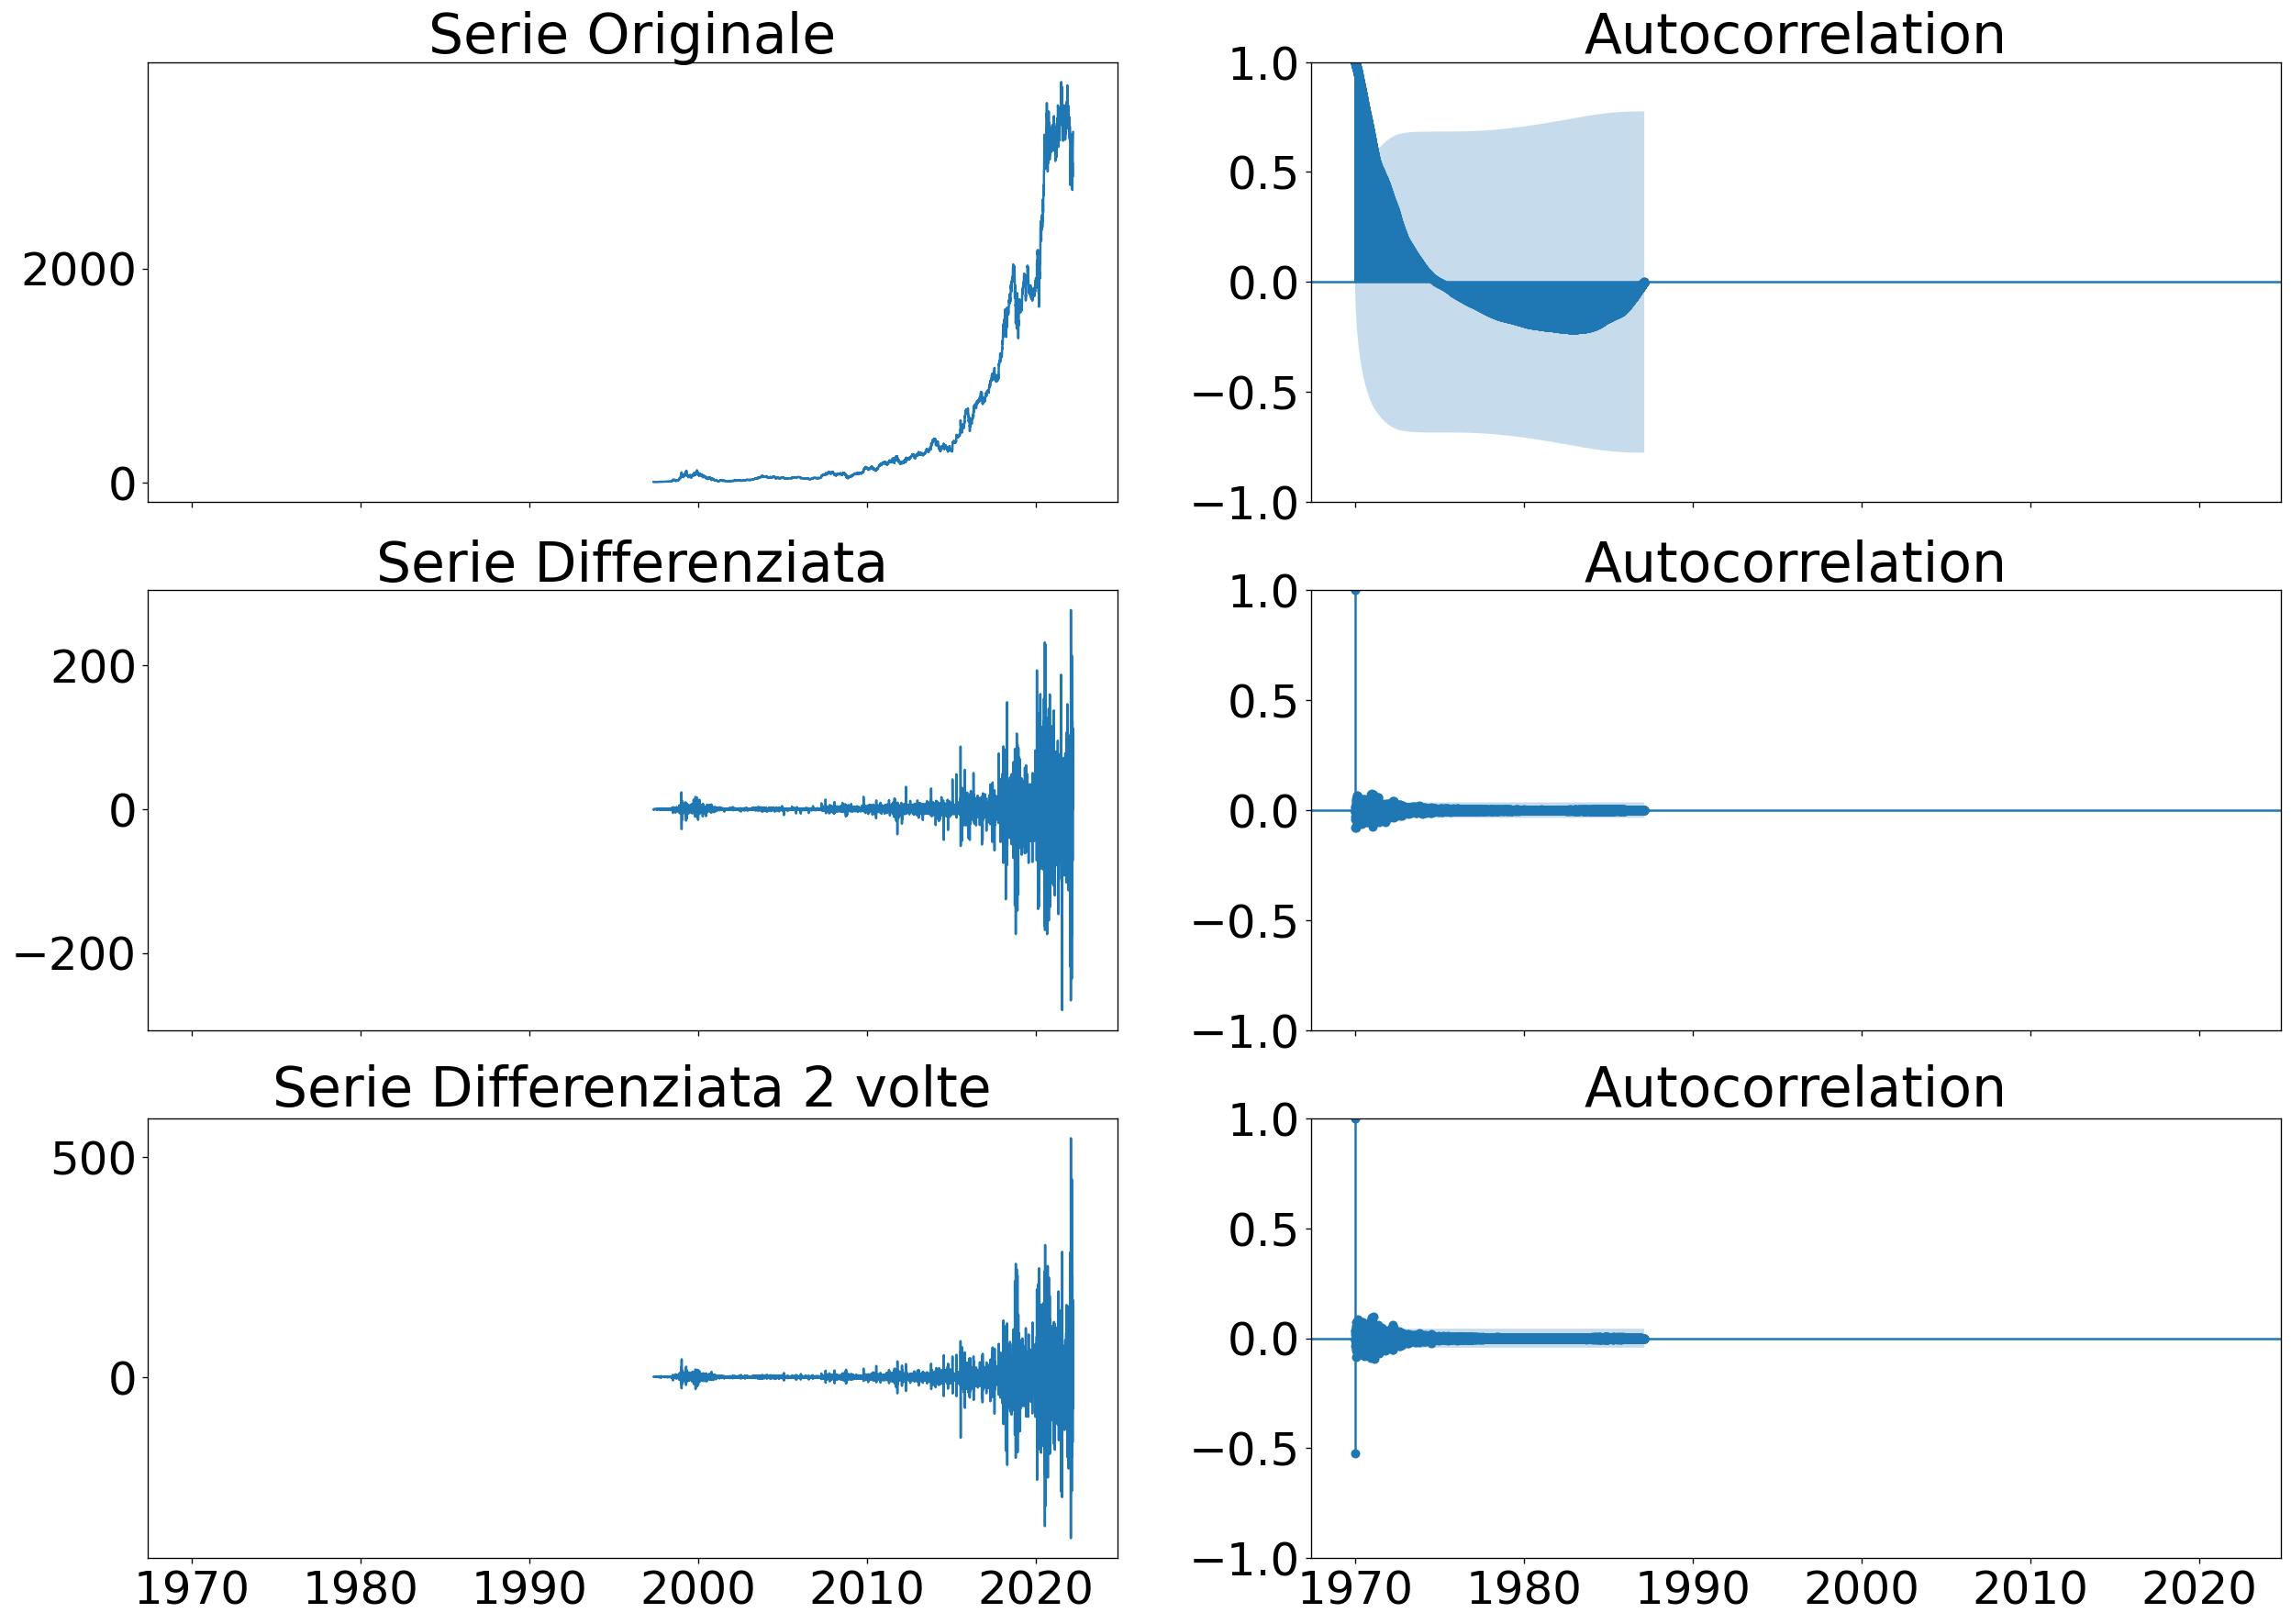

In [8]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller


plt.rcParams.update({'figure.figsize':(25,18), 'figure.dpi':120, 'font.size':30})

df = pd.read_csv('C:/Users/aless/Desktop/AMZN.csv',header=0)
#df = df[df.Date.str.split('-',expand=True)[0].isin(["2021","2022"])]

df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)
df["Open"].plot()
df["Close"].plot()
df["High"].plot()
df["Low"].plot()
plt.legend(loc="upper left")
plt.show()



#Serie di letture di closing price
fig, axes = plt.subplots(nrows=3 , ncols=2, sharex=True)
axes[0,0].plot(df.Open)
axes[0,0].set_title("Serie Originale")
plot_acf(df.Open,ax=axes[0,1],lags=(len(df.Open)-1))

result = adfuller(df.Open.dropna())
print("p ADF test serie originale (Open) : "+str(result[1]))

#Differenziata Primo ordine dell'attributo closing price
axes[1,0].plot(df.Open.diff())
axes[1,0].set_title("Serie Differenziata")
plot_acf(df.Open.diff().dropna(),ax=axes[1,1],lags=(len(df.Open)-3))

result = adfuller(df.Open.diff().dropna())
print("p ADF test serie differenziata 1 volta (Open) : "+str(result[1]))

#Differenziata Secondo ordine dell'attributo closing price
axes[2,0].plot(df.Open.diff().diff())
axes[2,0].set_title("Serie Differenziata 2 volte")
plot_acf(df.Open.diff().diff().dropna(),ax=axes[2,1],lags=(len(df.Open)-5))

result = adfuller(df.Open.diff().diff().dropna())
print("p ADF test serie differenziata 2 volte (Open) : "+str(result[1]))

plt.show()